<a href="https://colab.research.google.com/github/jokoeliyanto/MySkill_DS/blob/main/Machine_Learning_MySkill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Prediction

Customer churn analysis refers to the customer attrition rate in a company. This analysis helps companies identify the cause of the churn and implement effective strategies for retention. Identifying customers who are likely to cancel their contracts soon.

- If the company can do that, it can handle users before churn
- The target variable that we want to predict is categorical and has only two possible outcomes: churn or not churn (Binary Classification).
- We also would like to understand why the model thinks our customers churn, and for that, we need to be able to interpret the model’s predictions.

We will use data from https://www.kaggle.com/blastchar/telco-customer-churn.

According to the description, this dataset has the following information:

- Services of the customers: phone; multiple lines; internet; tech support and extra services such as online security, backup, device protection, and TV streaming
- Account information: how long they have been clients, type of contract, type of payment method
- Charges: how much the client was charged in the past month and in total
- Demographic information: gender, age, and whether they have dependents or a partner
- Churn: yes/no, whether the customer left the company within the past month

# Steps for Customer Churn Prediction

The steps to be taken are,

1. Loading the Dataset
2. Understanding the Data
3. Performing Exploratory Data Analysis
4. Doing Data Pre-Processing
5. Machine Learning Modelling
6. Determining the Best Model

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#1 Loading the Dataset

In [ ]:
# load the dataset
df = pd.read_csv("telco_customer_churn.csv")

In [ ]:
# set the for show max columns
pd.set_option('display.max_columns', None)

# 2 Understanding the Data

In [ ]:
df.head(8)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No


In [ ]:
# Chek data sample
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6272,4636-OLWOE,Male,0,No,Yes,54,Yes,No,DSL,No,Yes,Yes,Yes,No,No,One year,Yes,Electronic check,61.00,3283.05,No
4531,4910-AQFFX,Male,0,Yes,Yes,9,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.35,661.25,Yes
796,2040-OBMLJ,Male,0,No,No,31,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,One year,No,Credit card (automatic),81.70,2548.65,No
868,3313-QKNKB,Male,0,Yes,No,59,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,One year,No,Electronic check,85.55,5084.65,Yes
6557,8709-KRDVL,Female,0,No,No,33,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.00,3320.6,No
3210,9055-MOJJJ,Female,0,Yes,Yes,64,Yes,No,DSL,Yes,No,No,Yes,Yes,No,One year,No,Mailed check,65.80,4068,No
5251,8485-GJCDN,Female,1,No,No,5,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,69.05,318.5,Yes
2357,9251-WNSOD,Female,0,Yes,No,67,Yes,Yes,DSL,Yes,Yes,Yes,No,No,Yes,One year,No,Mailed check,75.10,5064.45,No
5600,3799-ISUZQ,Male,0,Yes,Yes,7,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),69.95,529.5,Yes
3593,9540-JYROE,Male,0,No,No,8,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.10,551.35,Yes


In [ ]:
# Check columns name of the data
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Table shape
df.shape

(7043, 21)

In [ ]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Note : Wrong Data Type ==> [(SeniorCitizen, object), (MonthlyCharges, numerical)]

In [ ]:
# Fix Data Type
df['SeniorCitizen'] = df['SeniorCitizen'].astype('str')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Missing Value Check
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# Input Missing Data with mean
df = df.fillna(np.mean(df['TotalCharges']))
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
len(list(df.customerID.unique()))

7043

# 3 Performing Exploratory Data Analysis

In [ ]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

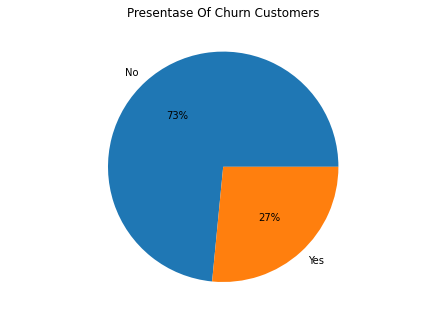

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No','Yes']
churn = df.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.title('Presentase Of Churn Customers')
plt.show()

In [ ]:
df.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.824757
MonthlyCharges,0.247900,1.000000,0.650468
TotalCharges,0.824757,0.650468,1.000000


## EDA for Numerical Values

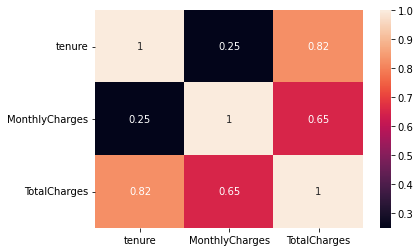

In [ ]:
#Now, let's look at the numerical data. Creating correlation heatmap

sns.heatmap(df.corr(),annot=True)

#Tenure and TotalCharges, Monthly and TotalCharges are corelated and it makes sense,as totalcharges = tenure*MonthlyCharges

In [ ]:
# Statistic for numerical value
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


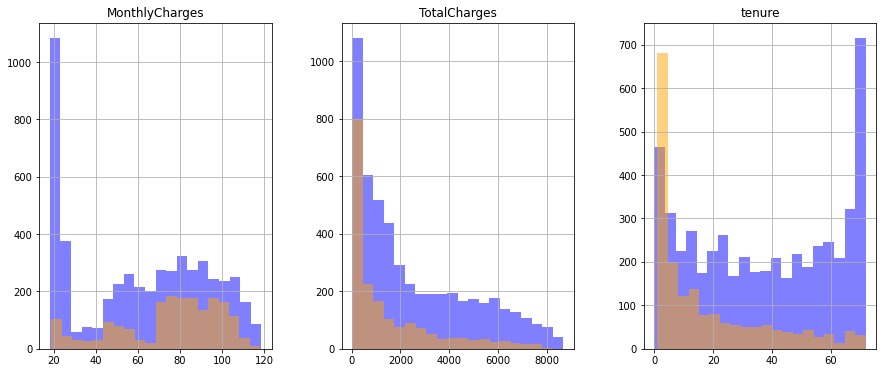

In [ ]:
#creating bin in chart
numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df[df.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

## EDA for Categorical Values

In [ ]:
# Statistic for vategorical value
df.describe(exclude=[np.number]) 

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Ideally SeniorCitizen column should be a factor, so let's convert 1,0 values to Yes,No and later we can label encode all factor columns

df.SeniorCitizen=df.SeniorCitizen.apply(lambda x: 'Yes' if x=='1' else 'No')
df.SeniorCitizen.value_counts()

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#It makes more sense to categorize customers wrt tenure, so let's convert tenure column to tenure range/buckets

def convert_to_buckets(tenure):
    if tenure <=24:
        return '0 - 24 months'
    elif tenure <=36:
        return '24 - 36 months'
    elif tenure <=48:
        return '36 - 48 months'
    elif tenure <=60:
        return '48 - 60 months'
    else:
        return '> 60 months'

df['tenure_group']=df['tenure'].map(convert_to_buckets)
df['tenure_group'].value_counts()

0 - 24 months     3210
> 60 months       1407
24 - 36 months     832
48 - 60 months     832
36 - 48 months     762
Name: tenure_group, dtype: int64

In [ ]:
cat_column_name = df.describe(exclude=[np.number]).columns
cat_column_name

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn', 'tenure_group'],
      dtype='object')

In [ ]:
pd.pivot_table(df, values='TotalCharges', index='tenure_group', columns='Churn',
                          aggfunc='count')

Churn,No,Yes
tenure_group,,
0 - 24 months,1879,1331
24 - 36 months,652,180
36 - 48 months,617,145
48 - 60 months,712,120
> 60 months,1314,93


In [ ]:
def eda_cat(df, column_index, column_hue):
  pivot_table = pd.pivot_table(df, values='TotalCharges', index=column_index, columns=column_hue,
                          aggfunc='count')
  pivot_table.plot(kind='bar', 
                   stacked=True, 
                   color=['green', 'red'],
                   title = 'Churn Customer Bar Chart Based on ' + column_index)

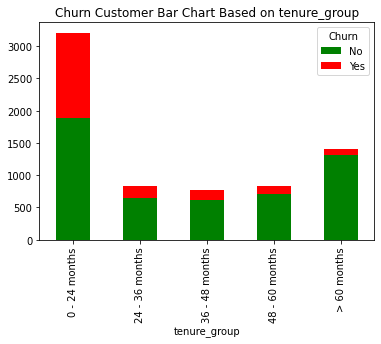

In [ ]:
# Churn base on tenure
eda_cat(df, 'tenure_group', 'Churn')

In [ ]:
cat_column_name = df.describe(exclude=[np.number]).columns
cat_column_name

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn', 'tenure_group'],
      dtype='object')

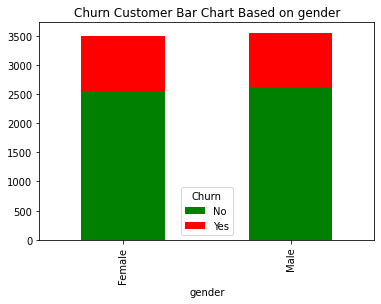

In [ ]:
# Churn base on gender
eda_cat(df, 'gender', 'Churn')

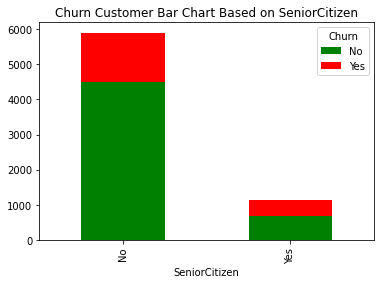

In [ ]:
# Churn base on SeniorCitizen
eda_cat(df, 'SeniorCitizen', 'Churn')

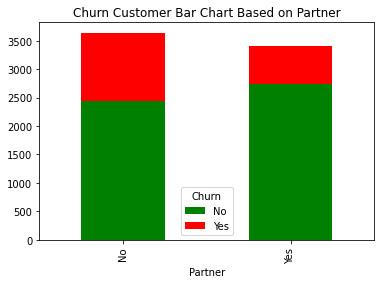

In [ ]:
# Churn base on Partner
eda_cat(df, 'Partner', 'Churn')

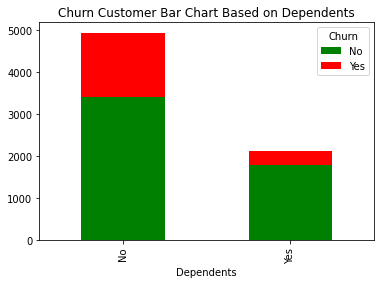

In [ ]:
# Churn base on Dependents
eda_cat(df, 'Dependents', 'Churn')

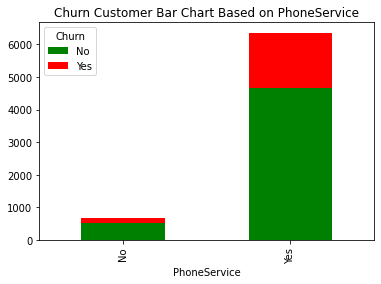

In [ ]:
# Churn base on PhoneService
eda_cat(df, 'PhoneService', 'Churn')

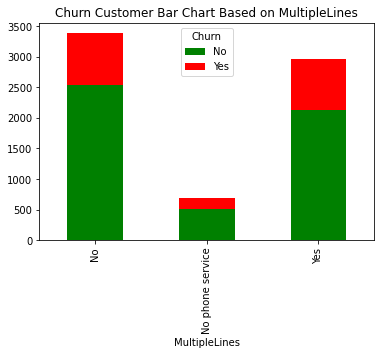

In [ ]:
# Churn base on MultipleLines
eda_cat(df, 'MultipleLines', 'Churn')

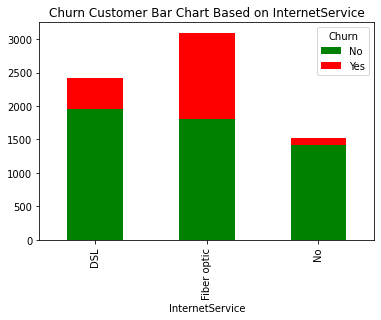

In [ ]:
# Churn base on InternetService
eda_cat(df, 'InternetService', 'Churn')

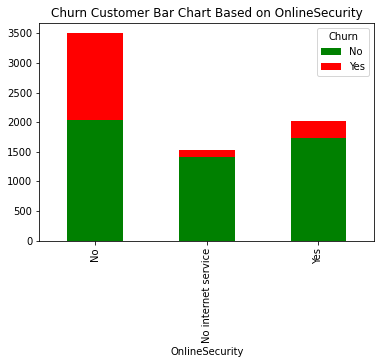

In [ ]:
# Churn base on OnlineSecurity
eda_cat(df, 'OnlineSecurity', 'Churn')

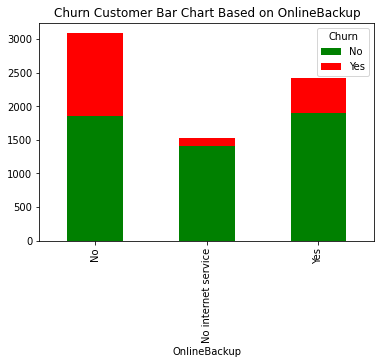

In [ ]:
# Churn base on OnlineBackup
eda_cat(df, 'OnlineBackup', 'Churn')

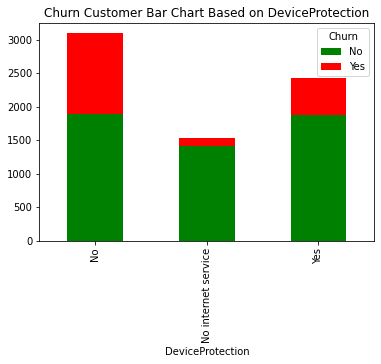

In [ ]:
# Churn base on DeviceProtection
eda_cat(df, 'DeviceProtection', 'Churn')

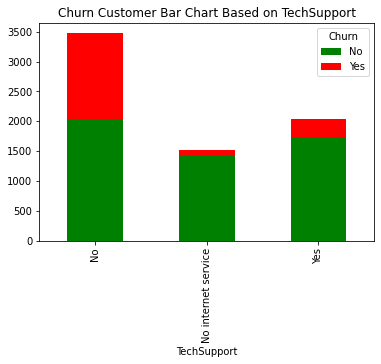

In [ ]:
# Churn base on TechSupport
eda_cat(df, 'TechSupport', 'Churn')

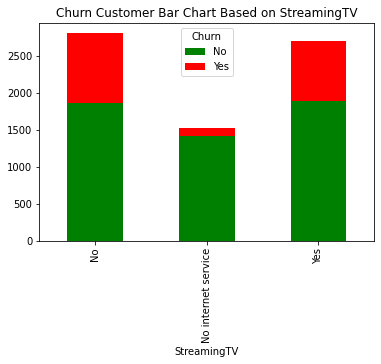

In [ ]:
# Churn base on StreamingTV
eda_cat(df, 'StreamingTV', 'Churn')

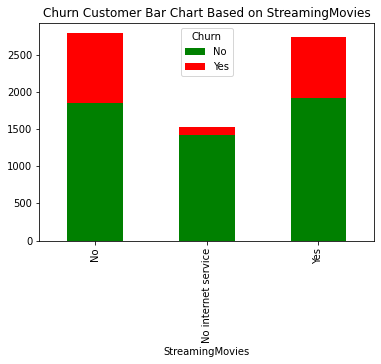

In [ ]:
# Churn base on StreamingMovies
eda_cat(df, 'StreamingMovies', 'Churn')

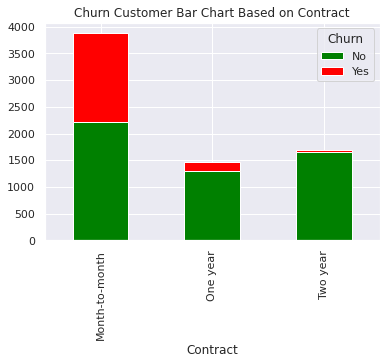

In [ ]:
# Churn base on Contract
eda_cat(df, 'Contract', 'Churn')

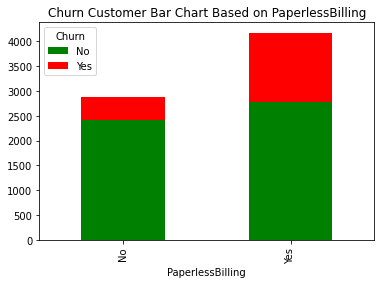

In [ ]:
# Churn base on PaperlessBilling
eda_cat(df, 'PaperlessBilling', 'Churn')

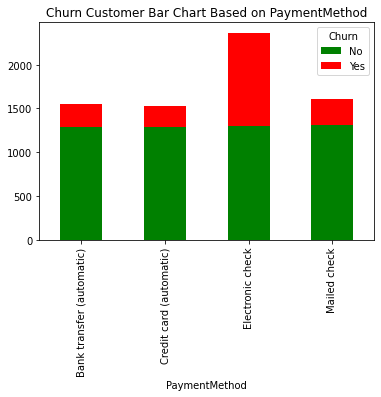

In [ ]:
# Churn base on PaymentMethod
eda_cat(df, 'PaymentMethod', 'Churn')

## Conclusion
Based on the results and analysis above, it can be concluded:

* First, we can see that the distribution of data as a whole does not churn customers, with details of Churn as much as 26% and No Churn as much as 74%.

* Second, we can see that for MonthlyCharges there is a tendency that the smaller the monthly fee charged, the smaller the tendency to Churn. For TotalCharges, there seems to be no trend towards Churn customers. For tenure, there is a tendency that the longer the customer subscribes, the smaller the tendency to Churn.

* Third, we can see that there is no significant difference for people who do churn in terms of gender and telephone service. However, there is a tendency that people who churn are people who do not have partners (partners: No), people whose status is senior citizens (SeniorCitizen: Yes), people who have TV streaming services (StreamingTV: Yes) , people who have Internet service (internetService: Yes) and people whose bills are paperless (PaperlessBilling: Yes).

#4 Data Pre-Processing / Feature Engineenring

## Removing Unnecessary Columns from data

Next we will delete the column that will not be included in the modeling, then save it with **name cleaned_df**. Show the top 5 rows.

Use **drop()** to remove a column from a data

In [ ]:
#Remove the unnecessary columns customerID & UpdatedAt
df = df.drop(['customerID', 'tenure_group'], axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Balancing Data Label

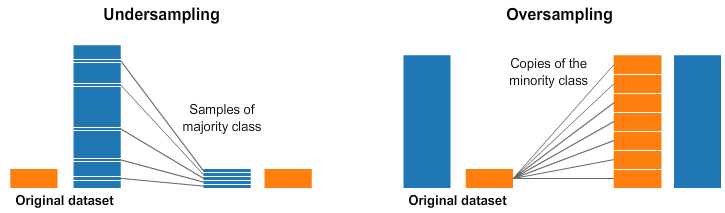

In [ ]:
# class count
class_count_0, class_count_1 = df['Churn'].value_counts()

# Separate class
class_0 = df[df['Churn'] == 'No']
class_1 = df[df['Churn'] == 'Yes']# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (5174, 20)
class 1: (1869, 20)


total class of Yes and No: No     1869
Yes    1869
Name: Churn, dtype: int64


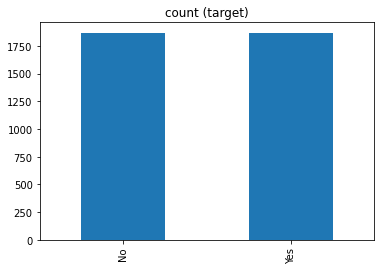

In [ ]:
class_0_under = class_0.sample(class_count_1)

df_use = pd.concat([class_0_under, class_1], axis=0)

print("total class of Yes and No:",df_use['Churn'].value_counts())# plot the count after under-sampeling
df_use['Churn'].value_counts().plot(kind='bar', title='count (target)')

In [ ]:
cat_column_name = df_use.describe(exclude=[np.number]).columns

In [ ]:
# Encoding data categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

for col in cat_column_name:
    df_use[col] = labelencoder.fit_transform(df_use[col])

df_use[cat_column_name].head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
1228,0,0,1,0,1,2,1,2,0,0,0,2,2,0,1,3,0
987,1,0,0,0,1,0,2,1,1,1,1,1,1,0,0,0,0
6699,0,0,0,0,1,0,2,1,1,1,1,1,1,2,1,3,0
6397,1,1,0,0,1,0,0,0,0,2,2,0,2,1,0,0,0
706,0,0,0,0,1,0,0,2,2,0,2,0,0,2,1,3,0


In [ ]:
# Split data into X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_use.drop(['Churn'], axis=1),
    df_use.Churn,
    test_size= 0.2,
    random_state=0,
    stratify=df_use.Churn
)

In [ ]:
# Print according to the expected result
print('The number of rows and columns of X_train is:', X_train.shape,', while the number of rows and columns of y_train is:', y_train.shape)
print('Churn percentage in Training data is:')
print(y_train.value_counts(normalize=True))
print('The number of rows and columns of X_test is:', X_test.shape,', while the number of rows and columns of y_test is:', y_test.shape)
print('Churn percentage in Testing data is:')
print(y_test.value_counts(normalize=True))

The number of rows and columns of X_train is: (2990, 19) , while the number of rows and columns of y_train is: (2990,)
Churn percentage in Training data is:
1    0.5
0    0.5
Name: Churn, dtype: float64
The number of rows and columns of X_test is: (748, 19) , while the number of rows and columns of y_test is: (748,)
Churn percentage in Testing data is:
1    0.5
0    0.5
Name: Churn, dtype: float64


## Conclusion

After further analysis, it turns out that there are columns that are not needed in the model, namely the customer ID number `customerID` & the data collection period `UpdatedAt`, so this needs to be deleted.

Then we continue to change the value of the data that is still in the form of a string to be numeric through encoding, after that it can be seen that the distribution of the data, especially the min and max columns of each variable, has changed to 0 & 1.

The last stage is to divide the data into 2 parts for modeling purposes, after it has been done, it can be seen from the number of rows and columns of each data is appropriate & the percentage of churn column is also the same as the data at the beginning, this indicates that the data is separated properly and correctly.

# 5 Machine Learning Modelling

Now, We're ready to go for model building, but before we do it.. Let's understand the metrics that matter for this specific problem.


*  Our ultimate goal is to retain as many churning customers as we can. We don't care much if we predict a customer to be churning turns out not churning ie., our Model should have more True positives and less False Negatives. It doesn't matter if we have many False Positives because we care more about no. of false Negatives. The less the no. of False Negatives, the more we're sure about retention.. 


Just to be clear: In our scenario/perspective:

* A False Positive is when we predict a customer to be churning turns out to be not Churning.
* A False Negative is when we predict a customer to be not churning turns out to be Churning.

It doesn't cost us much if we give an exciting offer (expensive for comapany) to a loyal customer who's not about to leave us. But it costs us a lot if we don't interact/give an offer to a customer who's about to leave us soon. (Because It's a standard rule that acquiring a customer costs more than retaining one.)



---

So, the metric we're looking for is  --> **RECALL**

Recall=TP/TP+FN

Recall gives us the measure of - What proportion of Churned Customers have we retained/Predicted. The less False Negatives we get, The more recall we have... Let's go ahead and build the model



We will create some machine learning models for this case. Then we choose the best model to use later.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

import pickle

from pathlib import Path 

## Logistic Regression



### Modeling

Next we will create a model using the **Logistic Regression** Algorithm.

Use **LogisticRegression()** to call the algorithm, fit to the train data and save it as **log_model**

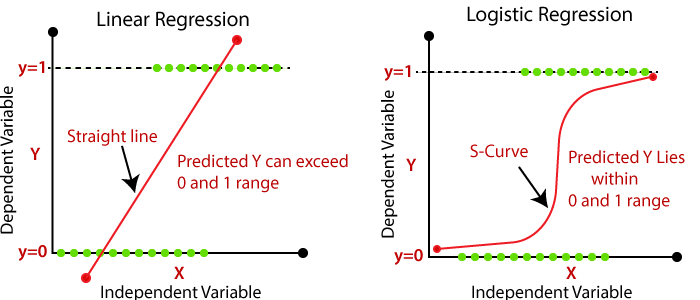

In [ ]:
log_model = LogisticRegression().fit(X_train,y_train)
print('The Logistic Regression model formed is: \n', log_model)

The Logistic Regression model formed is: 
 LogisticRegression()


### Model Performance On Data Training - Display Metrics

After we make the model, then do the calculations to get the classification report and the confusion matrix in the training data as shown below. Use **classification_report()** & **confusion_matrix()**.

In [ ]:
# Predict
y_train_pred = log_model.predict(X_train)
# Print classification report
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1495
           1       0.76      0.79      0.78      1495

    accuracy                           0.77      2990
   macro avg       0.77      0.77      0.77      2990
weighted avg       0.77      0.77      0.77      2990



### Model Performance on Data Training - Display Confusion Matrix Plots

After getting the results of the classification report in the previous stage, now we will visualize the report.

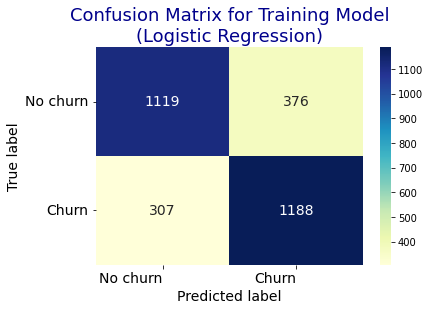

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Model Performance on Data Testing - Display Metrics

After we make the model, then do the calculations to get the classification report and the confusion matrix in the data testing as shown below.

Use **classification_report()** & **confusion_matrix()**.

In [ ]:
# Predict
y_test_pred = log_model.predict(X_test)
# Print classification report 
print('Classification Report Testing Model (Logistic Regression) :')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.75      0.74      0.75       374
           1       0.75      0.75      0.75       374

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748



### Model Performance on Data Testing - Display Confusion Matrix Plots

After displaying the metrics in the previous stage, now we will visualize the metrics that have been generated previously

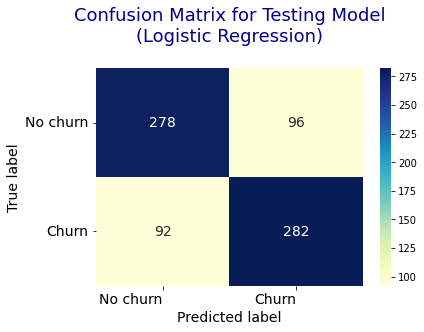

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Conclusion

From the results and analysis above, then:

* If we use the logistic regression algorithm by calling LogisticRegression() from sklearn without adding any parameters, then the resulting model with default settings from sklearn, details can be seen in the documentation.

* From the training data, it can be seen that the model is able to predict the data with an accuracy of 79%, with details of the correct churn guess, the churn is 645, the non-churn guess that doesn't actually churn is 3221, the non-churn guess that actually churns is 645 and the churn guess which actually doesn't churn is 354.

* From the data testing, it can be seen that the model is able to predict the data by producing an accuracy of 79%, with the details of the correct churn guess, the churn is 267, the non-churn guess that doesn't actually churn is 1390, the non-churn guess that actually has the churn is 279 and the churn guess which actually doesn't churn is 149.

## Random Forest Classifier

### Modeling

Next we will create a model using the **Random Forest Classifier** Algorithm.

Use **RandomForestClassifier()** to call the algorithm, fit to train data and save as **rdf_model**

In [ ]:
#Train the model
rdf_model = RandomForestClassifier().fit(X_train,y_train)
print(rdf_model)

RandomForestClassifier()


### Model Performance On Data Training - Display Metrics

After we make the model, then do the calculations to get the classification report and the confusion matrix in the **training data** as shown below.

Use **classification_report()** & **confusion_matrix()**.

In [ ]:
# Predict
y_train_pred = rdf_model.predict(X_train)
# Print classification report 
print('Classification Report Training Model (Random Forest) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Random Forest) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1495
           1       1.00      1.00      1.00      1495

    accuracy                           1.00      2990
   macro avg       1.00      1.00      1.00      2990
weighted avg       1.00      1.00      1.00      2990



### Model Performance On Data Training - Display Confusion Matrix Plots

After displaying the metrics in the previous stage, then we will visualize the metrics

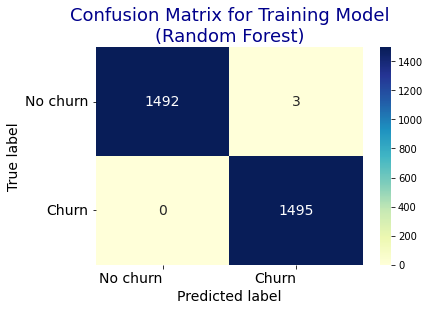

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Model Performance On Data Testing - Display Metrics

After we make the model, then do the calculations to get the classification report and the confusion matrix in **data testing** as shown below.

Use **classification_report()** & **confusion_matrix()**.

In [ ]:
# Predict
y_test_pred = rdf_model.predict(X_test)
# Print classification report 
print('Classification Report Testing Model (Random Forest) :')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest) :
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       374
           1       0.74      0.74      0.74       374

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.74      0.74      0.74       748



### Model Performance On Data Testing - Display Confusion Matrix Plots

Show a visualization of the results of the metrics that have been obtained in the previous stage

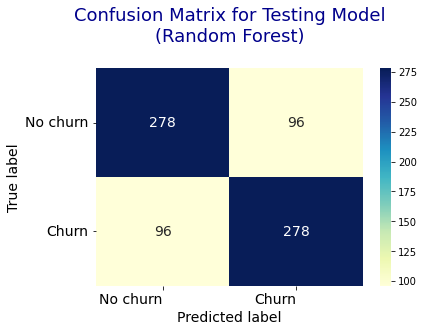

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Conclusion

From the results and analysis above, then:

* If we use the Random Forest algorithm by calling **RandomForestClassifier()** from sklearn without adding any parameters, the resulting model with the default settings of sklearn, for details can be seen in the documentation.

* From the training data, it can be seen that the model is able to predict the data with an accuracy of 100%, with details of the correct churn guess, the churn is 1272, the non-churn guess that doesn't actually churn is 3570, the no-churn guess that actually churns is 18 and the churn guess which actually doesn't churn is 5.

* From the data testing, it can be seen that the model is able to predict the data with an accuracy of 78%, with the details of the correct churn guess that actually churn is 256, the non-churn guess that doesn't actually churn is 1363, the non-churn guess that actually churn is 290 and the churn guess which actually doesn't churn is 1176.

## Gradient Boosting Classifier

### Modeling

Next we will create a model using the Gradient Boosting Classifier Algorithm.

 
Use **GradientBoostingClassifier()** to call the algorithm, fit to train data and save as **gbt_model**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
#Train the model
gbt_model = GradientBoostingClassifier().fit(X_train,y_train)
print(gbt_model)

GradientBoostingClassifier()


### Model Performance On Data Training - Display Metrics

After we make the model, then do the calculations to get the classification report and the confusion matrix in the training data as shown below.

Use **classification_report()** & **confusion_matrix()**.

In [ ]:
# Predict
y_train_pred = gbt_model.predict(X_train)
# Print classification report 
print('Classification Report Training Model (Gradient Boosting) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Gradient Boosting) :
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1495
           1       0.79      0.85      0.82      1495

    accuracy                           0.81      2990
   macro avg       0.81      0.81      0.81      2990
weighted avg       0.81      0.81      0.81      2990



### Model Performance On Data Training - Display Confusion Matrix Plots

Show a visualization of the results of the metrics that have been obtained in the previous stage

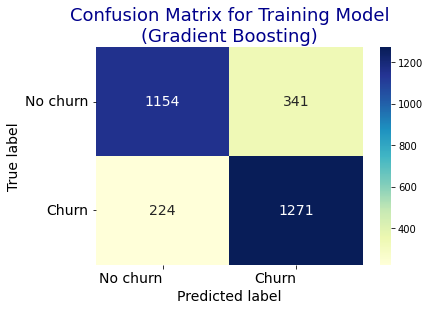

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Model Performance on Data Testing - Displaying Metrics

After we make the model, then do the calculations to get the classification report and the confusion matrix in the data testing as shown below.

Use **classification_report()** & **confusion_matrix()**.

In [ ]:
# Predict
y_test_pred = gbt_model.predict(X_test)
# Print classification report 
print('Classification Report Testing Model (Gradient Boosting) :')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Gradient Boosting) :
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       374
           1       0.73      0.78      0.75       374

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748



### Model Performance On Data Testing - Display Confusion Matrix Plots

Show a visualization of the results of the metrics that have been obtained in the previous stage

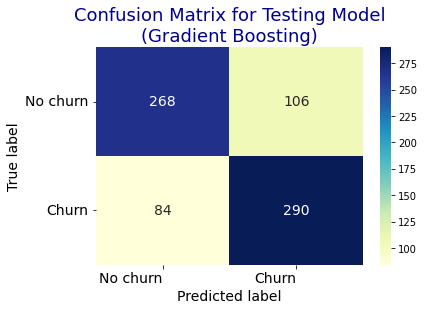

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### Conclusion

From the results and analysis above, then:

* If we use the Gradient Boosting algorithm by calling GradientBoostingClassifier() from the sklearn package without adding any parameters, the resulting model with the default settings of sklearn, for details can be seen in the documentation.

* From the training data, it can be seen that the model is able to predict the data by producing an accuracy of 82%, with the details of the correct churn guess, the churn is 684, the non-churn guess that doesn't actually churn is 3286, the non-churn guess that actually churns is 606 and the churn guess which actually doesn't churn is 289.

* From the data testing, it can be seen that the model is able to predict the data with an accuracy of 79%, with details of the correct churn guess, the churn is 261, the guess not churn that actually doesn't churn is 1394, the guess not churn that actually churn is 285 and the guess churn which actually doesn't churn is 145.

# 6 Determining the Best Model Algorithm



A good model is a model that is able to provide good performance in the training and testing phases of the model.

* Over-Fitting is a condition where the model is able to predict very well in the training phase, but cannot predict as well in the testing phase.
* Under-Fitting is a condition where the model is not able to predict well in the training phase, but is able to predict well in the testing phase.
* Appropriate-Fitting is a condition where the model is able to predict well in the training phase and in the testing phase.

For detailed details, can be seen in the illustration below:

<table>
  <tr><td>
    <img src="https://raw.githubusercontent.com/jokoeliyanto/ppp/main/images/download.png">
  </td></tr>
<table>

Next, we will determine the best algorithm model from the model that has been done above (Appropriate-Fitting), then we save it as a best_model_churn.pkl file with the aim of modeling later we don't need to repeat the modeling, just call the file. Save in the file directory according to the dataset, then check whether the file is properly saved or not. Use **dump()** from **pickle** to save the file. You can use the code below to save the model file to try on your local laptop.

In [ ]:
print(log_model)

LogisticRegression()


# Conclusion

|              Model           | Accuracy Data Training | Accuracy Data Testing |
| ---------------------------- | ---------------------- |-----------------------|
| Logistic Regression          | 79 %                   |    79%                   |
| Random Forest Classifier     | 100 % (Over-fitting)              |    78%                   |
| Gradient Boosting Classifier | 82 %                  |        79%               |



Based on the results above, it is concluded that the best model is the Gradient Boosting Classifier model. This is due to the acquisition of accuracy on the testing data which is the same as the Logistic Regression model, but it has a higher accuracy on the training data. This value also does not include over-fitting.